<a href="https://colab.research.google.com/github/aniketsharma00411/episodic_memory/blob/main/retrieval_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

# MNIST

In [ ]:
img_dim = 28

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

orig_train_images = train_images.astype('float32')/255
orig_test_images = test_images.astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def get_predictions(imgs):
    pred_train_images = []
    for img in imgs:
        new_img = list(img.copy())
        new_img.pop(0)
        new_img.append([0]*len(new_img[0]))
        new_img = np.array(new_img)
        pred_train_images.append(new_img)

    return np.asarray(pred_train_images)

In [ ]:
pred_train_images = get_predictions(orig_train_images)
pred_test_images = get_predictions(orig_test_images)

In [ ]:
train_images = orig_train_images.reshape((60000, img_dim, 1, img_dim))
test_images = orig_test_images.reshape((10000, img_dim, 1, img_dim))

In [ ]:
model1 = Sequential()
model1.add(TimeDistributed(LSTM(256), input_shape=(img_dim, 1, img_dim)))
model1.add(Dense(img_dim, activation='sigmoid'))
model1.add(Reshape((img_dim, img_dim)))

In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
model1.fit(
    train_images,
    pred_train_images,
    epochs=10,
    callbacks=[early_stopping],
    validation_data=(test_images, pred_test_images)
    )

Epoch 1/10
1875/1875 [==============================] - 26s 11ms/step - loss: 0.0381 - val_loss: 0.0279
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0278 - val_loss: 0.0274
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0275 - val_loss: 0.0270
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0271 - val_loss: 0.0266
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0267 - val_loss: 0.0263
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0264 - val_loss: 0.0260
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0261 - val_loss: 0.0258
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0259 - val_loss: 0.0256
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0258 - val_loss: 0.0255
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - 

In [ ]:
index=11329

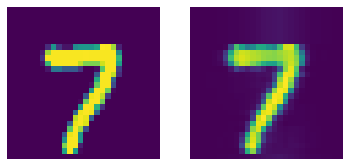

In [ ]:
figure, axis = plt.subplots(1, 2)

axis[0].imshow(orig_train_images[index])
axis[0].set_axis_off()

axis[1].imshow(model1.predict(np.asarray([train_images[index]]))[0])
axis[1].set_axis_off()

plt.show()

# CIFAR-10

In [ ]:
img_dim = 32

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

orig_train_images = train_images.astype('float32')/255
orig_test_images = test_images.astype('float32')/255

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
def get_predictions(imgs):
    pred_train_images = []
    for img in imgs:
        new_img = list(img.copy())
        new_img.pop(0)
        new_img.append(np.zeros((32,3)))
        new_img = np.array(new_img)
        pred_train_images.append(new_img)

    return np.asarray(pred_train_images)

In [ ]:
pred_train_images = get_predictions(orig_train_images)
pred_test_images = get_predictions(orig_test_images)

In [ ]:
train_images = orig_train_images.reshape((50000, img_dim, 1, img_dim*3))
test_images = orig_test_images.reshape((10000, img_dim, 1, img_dim*3))

In [ ]:
model2 = Sequential()
model2.add(TimeDistributed(LSTM(256), input_shape=(img_dim, 1, img_dim*3)))
model2.add(Dense(img_dim*3, activation='sigmoid'))
model2.add(Reshape((img_dim, img_dim, 3)))

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
model2.fit(
    train_images,
    pred_train_images,
    epochs=30,
    callbacks=[early_stopping],
    validation_data=(test_images, pred_test_images)
    )

Epoch 1/30
1563/1563 [==============================] - 16s 9ms/step - loss: 0.0206 - val_loss: 0.0180
Epoch 2/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 3/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 4/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0176 - val_loss: 0.0175
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0175 - val_loss: 0.0174
Epoch 8/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 9/30
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 10/30
1563/1563 [==============================] - 14s 9ms/step - 

In [ ]:
index=1942

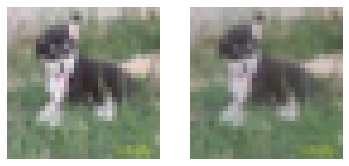

In [ ]:
figure, axis = plt.subplots(1, 2)

axis[0].imshow(orig_train_images[index])
axis[0].set_axis_off()

axis[1].imshow(model2.predict(np.asarray([train_images[index]]))[0])
axis[1].set_axis_off()

plt.show()

# Fashion MNIST

In [ ]:
img_dim = 28

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

orig_train_images = train_images.astype('float32')/255
orig_test_images = test_images.astype('float32')/255

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
def get_predictions(imgs):
    pred_train_images = []
    for img in imgs:
        new_img = list(img.copy())
        new_img.pop(0)
        new_img.append([0]*len(new_img[0]))
        new_img = np.array(new_img)
        pred_train_images.append(new_img)

    return np.asarray(pred_train_images)

In [ ]:
pred_train_images = get_predictions(orig_train_images)
pred_test_images = get_predictions(orig_test_images)

In [ ]:
train_images = orig_train_images.reshape((60000, img_dim, 1, img_dim))
test_images = orig_test_images.reshape((10000, img_dim, 1, img_dim))

In [ ]:
model3 = Sequential()
model3.add(TimeDistributed(LSTM(256), input_shape=(img_dim, 1, img_dim)))
model3.add(Dense(img_dim, activation='sigmoid'))
model3.add(Reshape((img_dim, img_dim)))

In [ ]:
model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
model3.fit(
    train_images,
    pred_train_images,
    epochs=25,
    callbacks=[early_stopping],
    validation_data=(test_images, pred_test_images)
    )

Epoch 1/25
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0314 - val_loss: 0.0228
Epoch 2/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 3/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0213 - val_loss: 0.0210
Epoch 4/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0208 - val_loss: 0.0206
Epoch 5/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0205 - val_loss: 0.0204
Epoch 6/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0203 - val_loss: 0.0202
Epoch 7/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0201 - val_loss: 0.0200
Epoch 8/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 9/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0198 - val_loss: 0.0197
Epoch 10/25
1875/1875 [==============================] - 12s 7ms/step - l

In [ ]:
index=33485

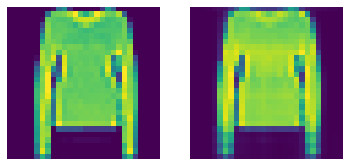

In [ ]:
figure, axis = plt.subplots(1, 2)

axis[0].imshow(orig_train_images[index])
axis[0].set_axis_off()

axis[1].imshow(model3.predict(np.asarray([train_images[index]]))[0])
axis[1].set_axis_off()

plt.show()